In [90]:
import pandas as pd
import os

df = pd.read_csv('C:/Cand.merc.BI/2. Semester/Data Science Project/Project/BilbasenProject/data/data_analysis/engineered_data_ID_4_pre_split.csv')

In [91]:
df.dtypes

Dealer/private             bool
Price_kr                  int64
Mileage_km                int64
Color                    object
AWD/RWD                    bool
Age_in_months             int64
Acceleration_category    object
Range_category           object
dtype: object

Convert object to category

In [92]:
df['Acceleration_category'] = pd.Categorical(df['Acceleration_category'], categories=['fast', 'medium', 'slow'], ordered=True)
df['Range_category'] = pd.Categorical(df['Range_category'], categories=['short', 'medium', 'long'], ordered=True)
df['Color'] = pd.Categorical(df['Color'])

In [93]:
df['Acceleration_category'].dtypes.ordered

True

In [94]:
df['Range_category'].dtypes.ordered

True

In [95]:
df['Color'].dtypes.ordered

False

In [129]:
df

,Dealer/private,Price_kr,Mileage_km,AWD/RWD,Age_in_months,Acceleration_category,Range_category
0,True,299800,2000,False,33,medium,medium
1,True,329800,5000,False,19,medium,medium
2,True,289900,7000,False,10,slow,long
3,True,419800,50,True,14,fast,short
4,True,359900,37,True,11,fast,medium
...,...,...,...,...,...,...,...
481,False,339000,15000,False,18,medium,medium
482,False,350000,8000,True,15,fast,medium
483,False,295000,25000,False,17,medium,medium
484,False,299500,42000,False,37,medium,medium


In [128]:
df = df.drop(columns=['Color'])

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=500)

Just checking the distributions of train and test

array([[<Axes: title={'center': 'Price_kr'}>,
        <Axes: title={'center': 'Mileage_km'}>],
       [<Axes: title={'center': 'Age_in_months'}>, <Axes: >]],
      dtype=object)

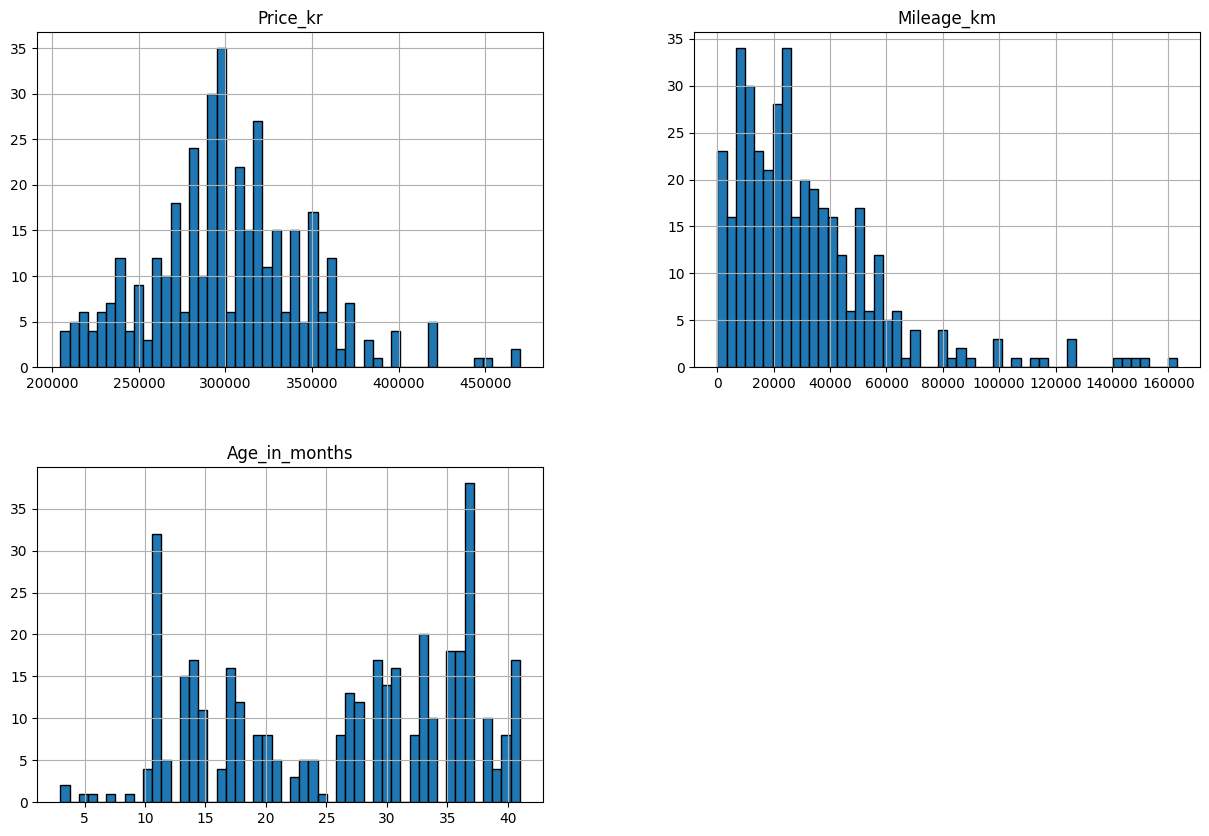

In [131]:
train_df.hist(bins=50, edgecolor='black', figsize=(15, 10))

array([[<Axes: title={'center': 'Price_kr'}>,
        <Axes: title={'center': 'Mileage_km'}>],
       [<Axes: title={'center': 'Age_in_months'}>, <Axes: >]],
      dtype=object)

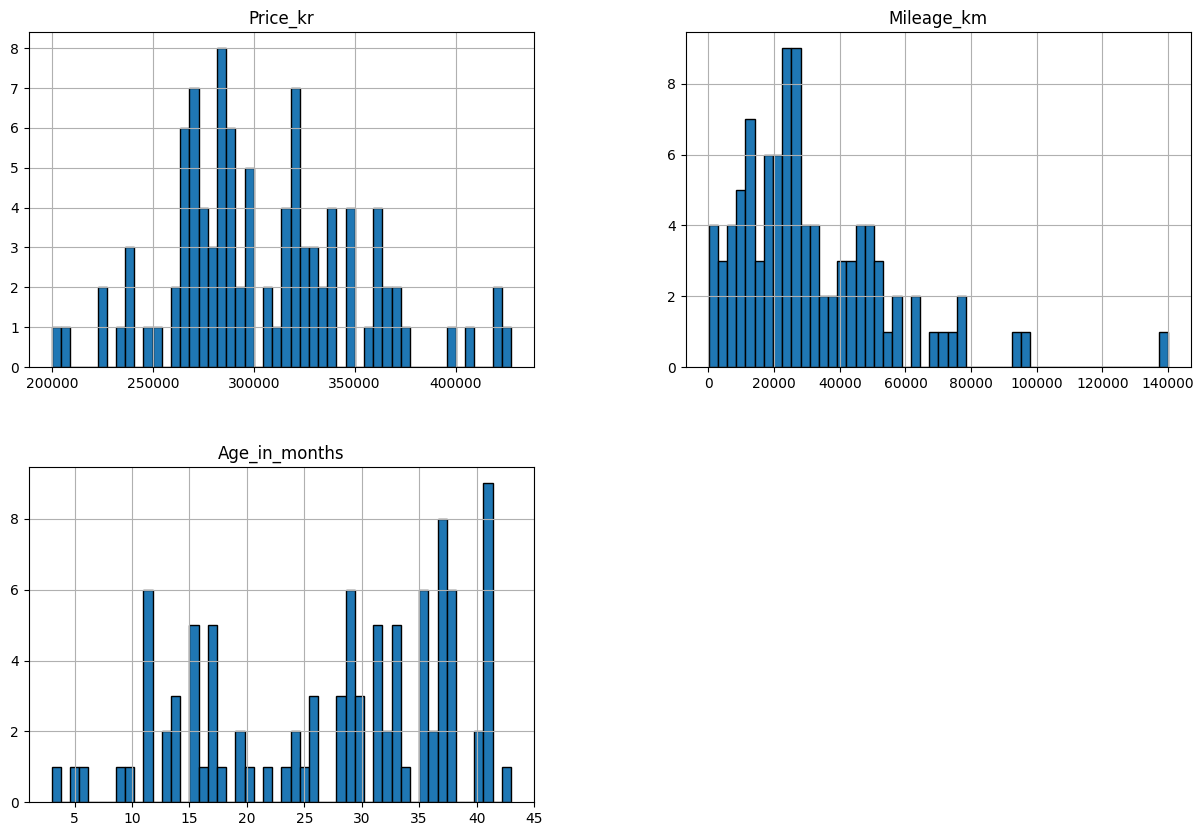

In [132]:
test_df.hist(bins=50, edgecolor='black', figsize=(15, 10))

Preparing for the models on training and testing

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Extract Features and Target from train_df
X_train = train_df.drop(columns=['Price_kr'])
y_train = train_df['Price_kr']

# Convert categorical features to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)

# Ensure the test set has the same dummy variables as the training set
X_test = test_df.drop(columns=['Price_kr'])
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

y_test = test_df['Price_kr']

Creating the models

In [138]:
#Paramgrid for tuning RF and Gradiant boosting

#For Random forest
param_grid_RF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],  # Adding deeper trees
    'min_samples_split': [2, 5, 10],  # Wider range for min_samples_split
    'min_samples_leaf': [1, 2, 4, 6],  # Wider range for min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Including 'auto' and 'log2'
    'bootstrap': [True, False]  # Including both bootstrap options
}




#For Gradiant boosting
param_grid_GB = {
    'n_estimators': [100, 200, 300],  # More trees
    'learning_rate': [0.01, 0.05, 0.1],  # Wider range for learning rates
    'max_depth': [3, 5, 7],  # Range of depths including shallower options
    'min_samples_split': [2, 5, 10],  # Wider range for min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Wider range for min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Including 'auto' and 'log2'
    'subsample': [0.8, 0.9, 1.0]  # Adding subsampling
}


In [139]:
#Grid searching

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#For Random forest
grid_search_RF = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_RF,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform Grid Search
grid_search_RF.fit(X_train, y_train)

# Get the best parameters
best_params_RF = grid_search_RF.best_params_
print("Best parameters found for RF: ", best_params_RF)


# For gradiant boosting
grid_search_GB = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_GB,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform Grid Search
grid_search_GB.fit(X_train, y_train)

# Get the best parameters
best_params_GB = grid_search_GB.best_params_
print("Best parameters found for GB: ", best_params_GB)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
899 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

Best parameters found for RF:  {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3645 fits failed out of a total of 10935.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1825 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

Best parameters found for GB:  {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}


In [140]:
#Train the linear regression Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#Linear model
model_train_LM = LinearRegression()
model_train_LM.fit(X_train, y_train)

#KNN model
model_train_KNN = KNeighborsRegressor(n_neighbors=4)
model_train_KNN.fit(X_train, y_train)

#Random Forest model
model_train_RF = RandomForestRegressor(**best_params_RF, random_state=42)
model_train_RF.fit(X_train, y_train)

#Gradient Boosting Regressor model
model_train_GBR = GradientBoostingRegressor(**best_params_GB, random_state=42)
model_train_GBR.fit(X_train, y_train)

# Instantiate and train the SVR model
model_train_SVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Adjust parameters as needed
model_train_SVR.fit(X_train, y_train)


SVR()

In [141]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to evaluate a model and return the metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, train_predictions)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, train_predictions)
    
    mse_test = mean_squared_error(y_test, test_predictions)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, test_predictions)
    
    return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

# List of models to evaluate
models = {
    'Linear Regression': model_train_LM,
    'KNN': model_train_KNN,
    'Random Forest': model_train_RF,
    'Gradient Boosting': model_train_GBR,
    'SVR': model_train_SVR
}

# Create a list to store the results
results = []

# Evaluate each model and store the results in the list
for model_name, model in models.items():
    mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name, 
        'MSE_Train': mse_train, 
        'RMSE_Train': rmse_train, 
        'R2_Train': r2_train,
        'MSE_Test': mse_test, 
        'RMSE_Test': rmse_test, 
        'R2_Test': r2_test
    })

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(results)

results_df


,Model,MSE_Train,RMSE_Train,R2_Train,MSE_Test,RMSE_Test,R2_Test
0,Linear Regression,5.111671e+08,22609.004916,0.754065,6.262504e+08,25024.994660,0.702128
1,KNN,9.813699e+08,31326.823495,0.527838,1.797237e+09,42393.833534,0.145156
2,Random Forest,2.649665e+08,16277.791895,0.872518,5.960745e+08,24414.636732,0.716481
3,Gradient Boosting,2.998673e+08,17316.676858,0.855726,5.603683e+08,23672.099979,0.733465
4,SVR,2.081595e+09,45624.500165,-0.001508,2.125816e+09,46106.576019,-0.011130


Testing the models results